# LR Circuit (SKP)

LR circuit with DC source:

* For growth of current,
$$ iR + L\frac{di}{dt} = V $$
$$ \implies \frac{di}{dt} = -\frac{iR - V}{L} $$

* For decay of current,
$$ iR + L\frac{di}{dt} = 0 $$
$$\implies \frac{di}{dt} = -\frac{iR}{L} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## LR circuit with DC source

### Growth of current

For growth of current,
$$ iR + L\frac{di}{dt} = V $$
$$ \implies \frac{di}{dt} = -\frac{iR - V}{L} $$

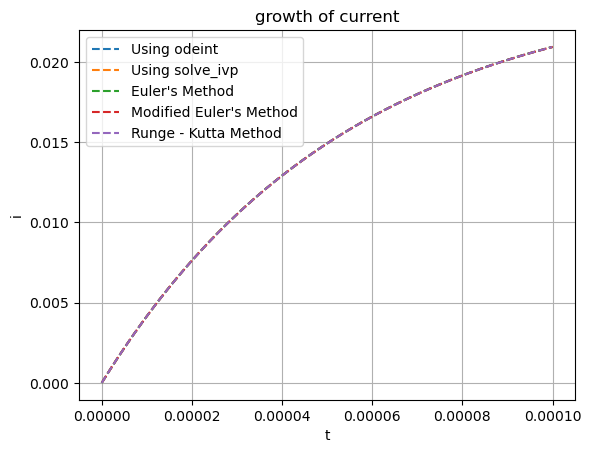

In [1]:
V = 5         # dc voltage in Volts
R = 200       # resistance in ohm
L = 11e-3   # inductance in H

# Write the differential equation (x=t, y=i).
def dydx(x,y):
    return -(y*R - V)/L

x_0, y_0 = 0, 0       # initial condition
x_min, x_max = x_0, 1e-4   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

# Euler's Method 
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('i')
plt.title('growth of current')
plt.legend()
plt.grid()
plt.show()

### Decay of current

For decay of current,
$$ iR + L\frac{di}{dt} = 0 $$
$$\implies \frac{di}{dt} = -\frac{iR}{L} $$

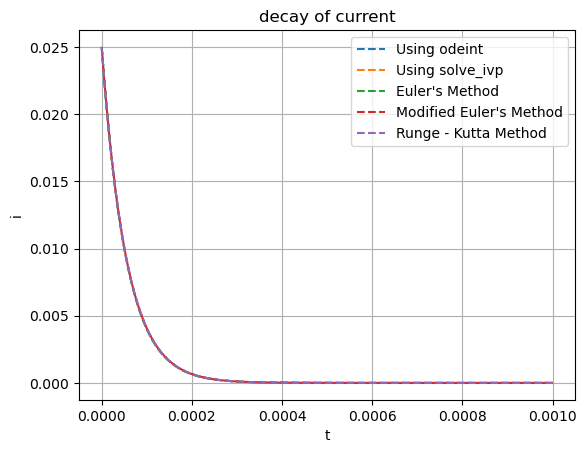

In [2]:
V = 5         # dc voltage (off) in Volts
R = 200       # resistance in ohm
L = 11e-3   # inductance in H
i0 = V/R   # initial current

# Write the differential equation (x=t, y=i).
def dydx(x,y):
    return -(y*R)/L

x_0, y_0 = 0, i0       # initial condition
x_min, x_max = x_0, 1e-3   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')

# Euler's Method 
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('i')
plt.title('decay of current')
plt.legend()
plt.grid()
plt.show()

## LR circuit with AC source